In [89]:
import awkward as ak
import uproot
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
mpl.rcParams['figure.dpi'] = 300

import seaborn as sns
from scipy import stats

from coffea.nanoevents import NanoEventsFactory, BaseSchema

In [3]:
file_dir = '/ecoderemdvol/features/ntuple.root'

signalfile = uproot.open(file_dir)

events = NanoEventsFactory.from_root(
signalfile,
treepath='FloatingpointThreshold0DummyHistomaxGenmatchGenclustersntuple/HGCalTriggerNtuple',
#entry_stop=10,
#metadata={"dataset": "llp"},
schemaclass=BaseSchema,
).events()

gen_pt = events.gen_pt[:,0]
gen_eta = events.gen_eta[:,0]

In [4]:
np.count_nonzero(gen_pt < 35), np.count_nonzero(gen_pt >=35)

(564, 2851)

<function matplotlib.pyplot.savefig(*args, **kwargs)>

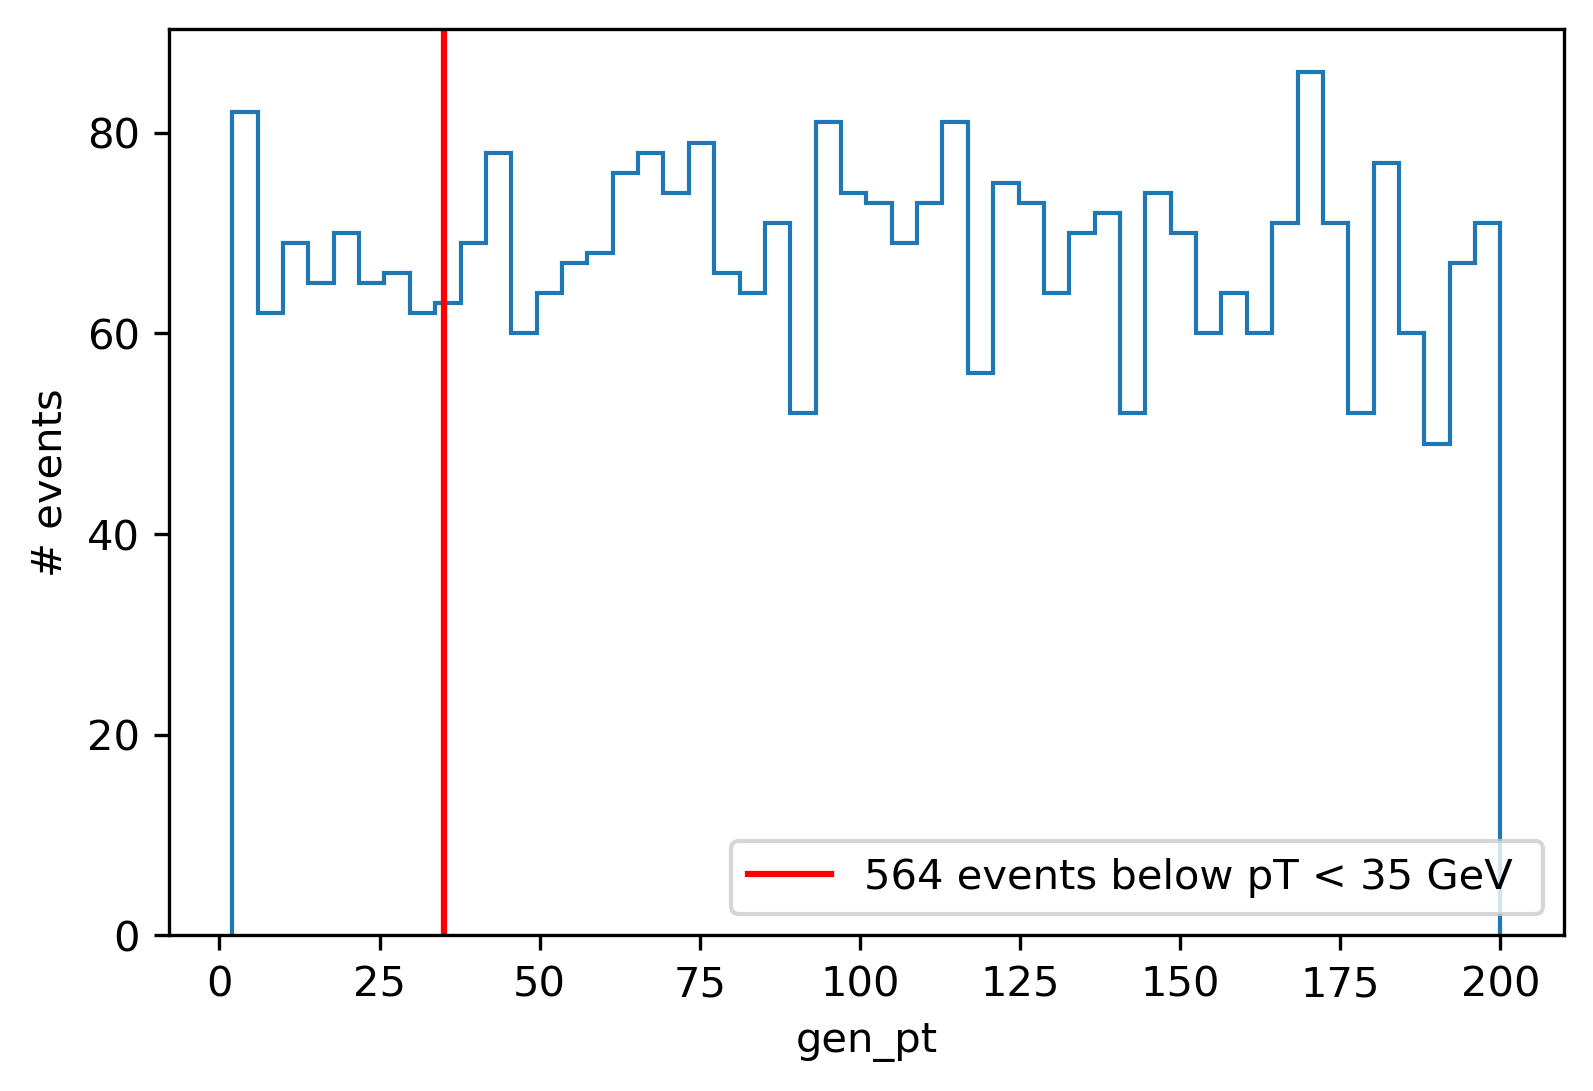

In [7]:
plt.hist(gen_pt,50,histtype='step');
plt.xlabel('gen_pt')
plt.ylabel('# events')
plt.axvline(x = 35,color = 'red',label = '{} events below pT < 35 GeV '.format(np.count_nonzero(gen_pt < 35)))
plt.legend(loc='lower right')
plt.savefig

Text(0, 0.5, '# events')

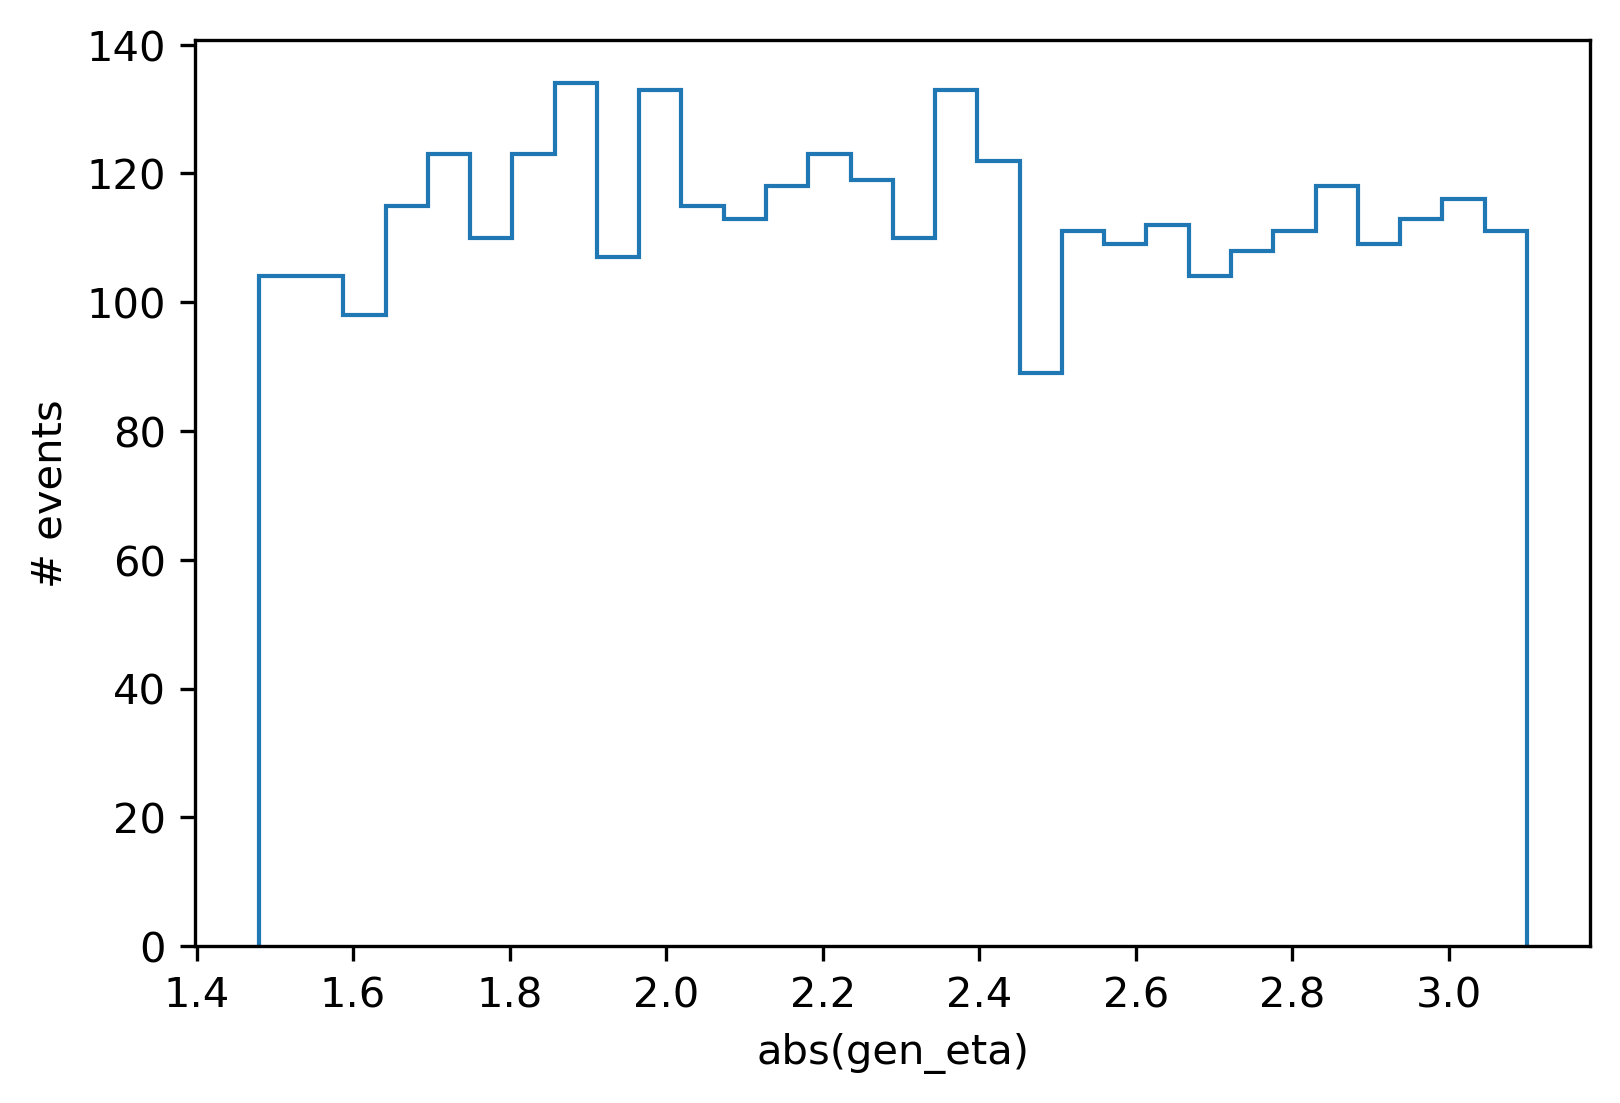

In [8]:
plt.hist(abs(gen_eta),30,histtype='step');
plt.xlabel('abs(gen_eta)')
plt.ylabel('# events')

In [9]:
tc_data = pd.read_csv('/ecoderemdvol/features/low_pt.csv')

In [10]:
tc_data

,CALQ_0,CALQ_1,CALQ_2,CALQ_3,CALQ_4,CALQ_5,CALQ_6,CALQ_7,CALQ_8,CALQ_9,...,CALQ_47,entry,zside,layer,waferu,waferv,simenergy,subdet,tc_eta,tc_phi
0,0,0,0,0,0,0,0,0,0,0,...,0,241.0,-1.0,50.0,5.0,4.0,0.0,2,2.692211,2.404243
1,0,0,0,0,0,0,0,0,4,0,...,0,240.0,-1.0,50.0,5.0,4.0,0.0,2,2.692211,2.404243
2,0,0,0,0,0,0,0,0,0,0,...,0,239.0,-1.0,50.0,5.0,4.0,0.0,2,2.692211,2.404243
3,0,0,0,0,10,0,0,0,0,0,...,0,236.0,-1.0,50.0,5.0,4.0,0.0,2,2.692211,2.404243
4,0,0,0,0,0,0,0,0,0,0,...,0,232.0,-1.0,50.0,5.0,4.0,0.0,2,2.692211,2.404243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201727,0,0,0,0,0,0,3,0,0,0,...,0,204.0,1.0,48.0,1.0,7.0,0.0,2,2.366334,1.185757
3201728,0,0,98,0,0,0,0,0,0,0,...,0,206.0,1.0,48.0,1.0,7.0,0.0,2,2.366334,1.185757
3201729,0,0,0,0,0,0,0,0,0,0,...,0,225.0,1.0,48.0,1.0,7.0,0.0,2,2.366334,1.185757
3201730,0,0,0,0,0,0,0,0,0,0,...,0,229.0,1.0,48.0,1.0,7.0,0.0,2,2.366334,1.185757


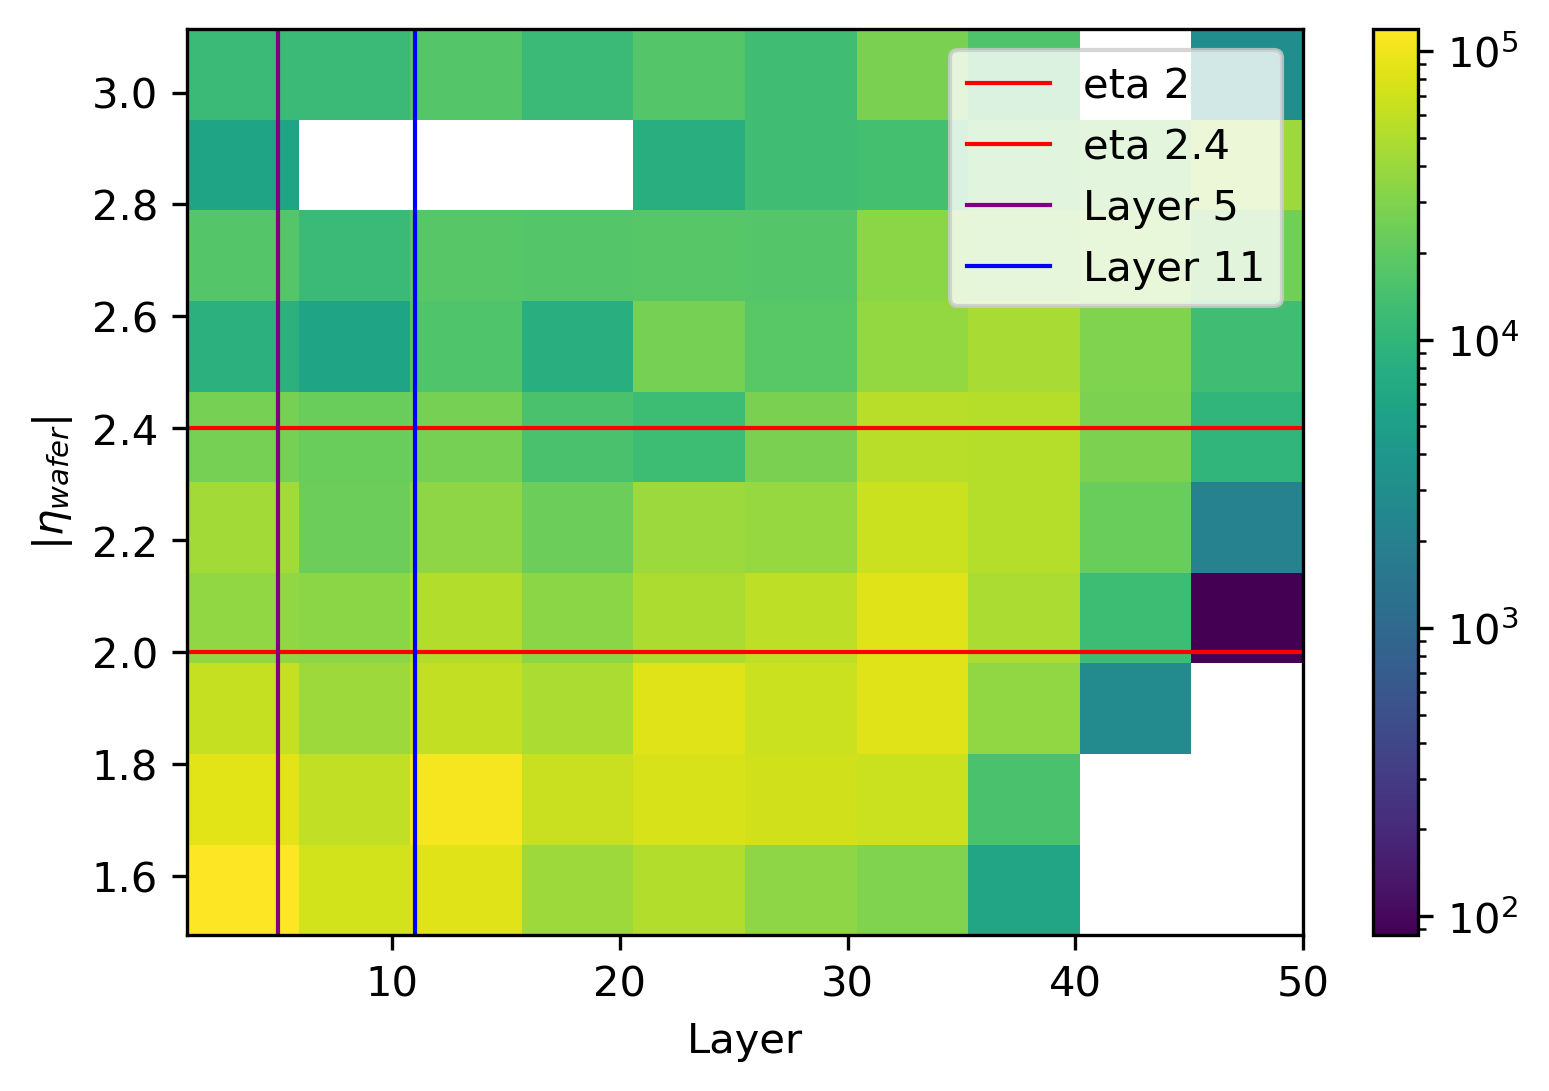

In [91]:
fig, ax = plt.subplots()

h = ax.hist2d(tc_data.layer,tc_data.tc_eta, norm=LogNorm());
plt.axhline(y=2.0,color='red',linewidth=1,label = 'eta 2')
plt.axhline(y=2.4,color='red',linewidth=1,label = 'eta 2.4')
plt.axvline(x=5,color='purple',linewidth=1,label = 'Layer 5')
plt.axvline(x=11,color='blue',linewidth=1,label = 'Layer 11')
plt.xlabel('Layer')
plt.ylabel(r'$|\eta_{wafer}|$')
plt.legend()
fig.colorbar(h[3], ax=ax)

In [23]:
layers = np.sort(tc_data['layer'].unique().astype('int'))

In [24]:
sum_sims = []
for layer in layers:
    sum = ((tc_data['simenergy'][tc_data.layer==layer]).sum())
    sum_sims.append(sum)

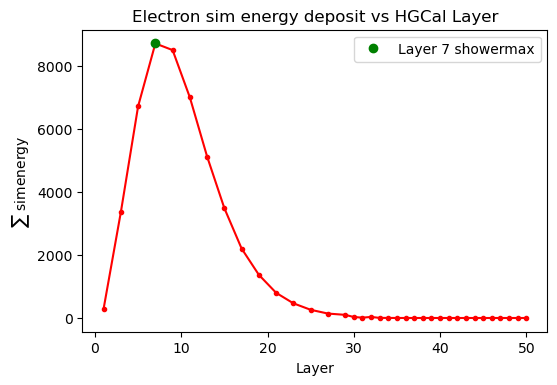

In [25]:
plt.plot(layers, sum_sims,'r.-')
plt.plot(layers[np.argmax(sum_sims)],np.max(sum_sims),'go',label ='Layer {} showermax'.format(layers[np.argmax(sum_sims)]))
plt.xlabel('Layer')
plt.ylabel(r'$\sum$ simenergy')
plt.title('Electron sim energy deposit vs HGCal Layer')
plt.legend();

### Splitting the dataset

In [72]:
low_eta = tc_data[tc_data.tc_eta<=2.0]
med_eta = tc_data[tc_data.tc_eta>2.0][tc_data.tc_eta<=2.4]
high_eta = tc_data[tc_data.tc_eta>2.4]

/tmp/ipykernel_103/2581916227.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  med_eta = tc_data[tc_data.tc_eta>2.0][tc_data.tc_eta<=2.4]


In [73]:
CALQ_COLS = ['CALQ_%i'%c for c in range(0, 48)]

low_eta['occ']= np.count_nonzero(low_eta[CALQ_COLS],axis=1) 
med_eta['occ']= np.count_nonzero(med_eta[CALQ_COLS],axis=1)
high_eta['occ']= np.count_nonzero(high_eta[CALQ_COLS],axis=1)

/tmp/ipykernel_103/3051709807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_eta['occ']= np.count_nonzero(low_eta[CALQ_COLS],axis=1)
/tmp/ipykernel_103/3051709807.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_eta['occ']= np.count_nonzero(med_eta[CALQ_COLS],axis=1)
/tmp/ipykernel_103/3051709807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

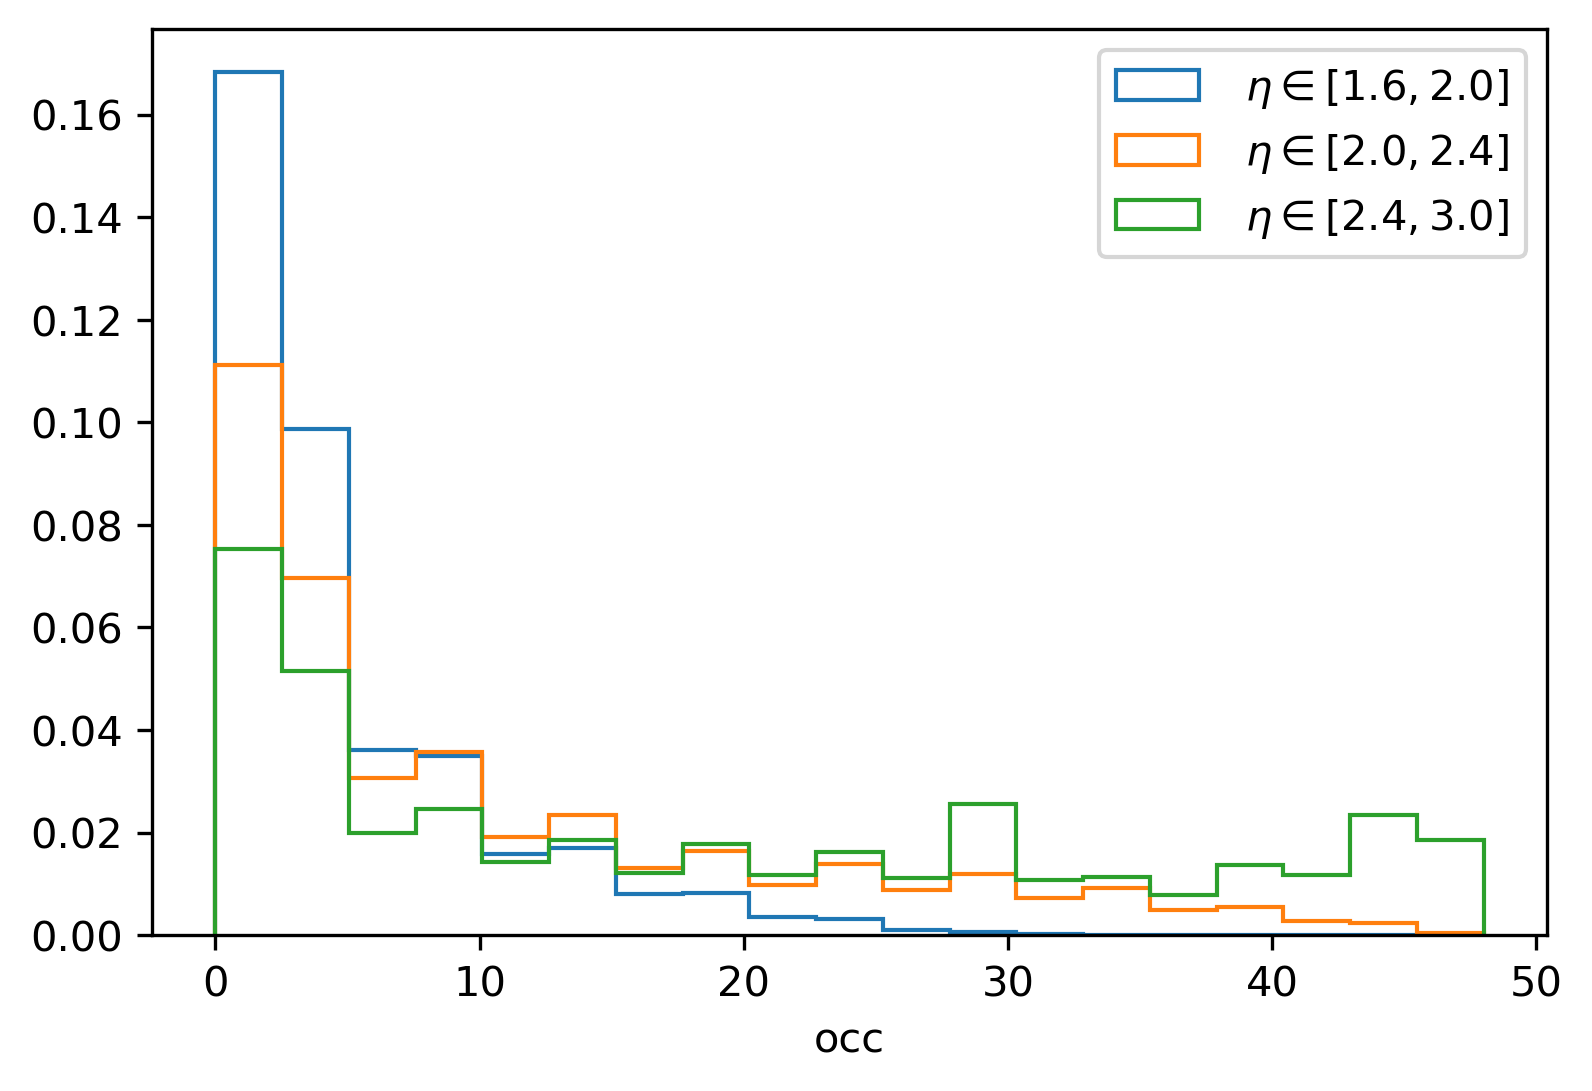

In [92]:
plt.hist(low_eta.occ,histtype='step',density = True,bins=np.linspace(0,48,20),label = r' $\eta \in [1.6,2.0]$')
plt.hist(med_eta.occ,histtype='step',density = True,bins=np.linspace(0,48,20),label = r' $\eta \in [2.0,2.4]$')
plt.hist(high_eta.occ,histtype='step',density = True,bins=np.linspace(0,48,20),label = r' $\eta \in [2.4,3.0]$');
plt.xlabel('occ')
plt.legend()

In [94]:
#Splitting low eta in layerwise bins

lell = low_eta[low_eta.layer<5]
leml = low_eta[low_eta.layer>=5][low_eta.layer<=11]
lehl = low_eta[low_eta.layer>11]

/tmp/ipykernel_103/4013023698.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  leml = low_eta[low_eta.layer>=5][low_eta.layer<=11]


In [99]:
len(lell['layer']), len(leml['layer']),len(lehl['layer'])

(179233, 361203, 976345)

In [101]:
#Splitting med eta in layerwise bins

mell = med_eta[med_eta.layer<5]
meml = med_eta[med_eta.layer>=5][med_eta.layer<=11]
mehl = med_eta[med_eta.layer>11]

/tmp/ipykernel_103/901979325.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meml = med_eta[med_eta.layer>=5][med_eta.layer<=11]


In [102]:
len(mell['layer']), len(meml['layer']),len(mehl['layer'])

(63888, 115192, 695354)

In [103]:
#Splitting high eta in layerwise bins

hell = high_eta[high_eta.layer<5]
heml = high_eta[high_eta.layer>=5][high_eta.layer<=11]
hehl = high_eta[high_eta.layer>11]

/tmp/ipykernel_103/2632686687.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heml = high_eta[high_eta.layer>=5][high_eta.layer<=11]


In [104]:
len(hell['layer']), len(heml['layer']),len(hehl['layer'])

(34848, 88088, 687581)

In [106]:
!pip install varname

  Attempting uninstall: executing
    Found existing installation: executing 0.8.3
    Uninstalling executing-0.8.3:
      Successfully uninstalled executing-0.8.3


In [107]:
from varname import nameof

In [115]:
df_arr = [lell,leml,lehl,mell,meml,mehl,hell,heml,hehl]
name_arr = ['lell','leml','lehl','mell','meml','mehl','hell','heml','hehl']

In [118]:
for i in range(9):
    df_arr[i].to_csv('/ecoderemdvol/pu_study/data/{}.csv'.format(name_arr[i]))  

In [ ]:
!python Ecoder/quick_train.py -i /ecoderemdvol/pu_study/data/lell.csv -o ./test_lell_1/ --epoch 1 --AEonly 1 --nELinks 5 --quantize --noHeader --models 8x8_c8_S2_qK_RTL_emd_lphe

2022-10-17 22:37:43.250490: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-10-17 22:37:43.250549: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-17 22:37:43.250620: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ecoder-emd-pod): /proc/driver/nvidia/version does not exist
2022-10-17 22:37:43.251208: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[2022-10-17 22:37:44,714] INFO: Namespace(od